PCA principal Component Analysis

In [2]:
#PCA ile biz çok boyutlu veri setlerini, veri setinin anlamını kaybetmeden daha az boyutlu bir hale getirmeyi amaçlarız.
#1.çok fazla boyutlu veri setlerini kolay görselleştirmek için
#2. verileri sıkıştırmak için PCA yaparız.
# PCA yapılırken eigenvektörler çıkarılır. Sonra istenilen N boyuta indirgenir. işlem sırasında varyansla %90 korunur.

#veri sıkıştırma , fotoğraf sıkıştırma yapılır. 
# face recogniion algoritmaları çalıştırmadan bu işlem yapılarak en belirgin özellikler kalır.

Iris çiçeğinin 4 boyutlu/özellikli veri setini 2 boyuta indirgemeyi öğreneceğiz.

![alt text](2916a5c7-7905-44c3-b9d9-3229810b21ba.jpg)

3 iris bitki türü (iris setosa, iris virginica ve iris versicolor)

In [3]:
#Iris çiçeğinin 4 boyutlu/özellikli veri setini 2 boyuta indirgemeyi öğreneceğiz.
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler #farklı değer aralığında aynı scale içinde getirmek amaçlan kullanılır.
from sklearn.decomposition import PCA

url= "pca_iris.data"
#datasetimizi pandas DataFrame içine yüklüyoruz..
df= pd.read_csv(url, names=["sepal_length","sepal_width","petal_length","petal_width","target"])

df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
features= ["sepal_length","sepal_width","petal_length","petal_width"]
#feature'ları x olarak ayıralım
x=df[features]

#target'ı y olarak ayıralımy
y=df[["target"]]

Değerleri scale etmemiz gerekiyor. Çünkü her bir feature çok farklı boyyutlarda ve bunların yapay zeka tarafından eşit ağırlıklarda dengelenmesi gerekiyor. Bu amaçla standart scaler kullanarak tüm verileri mean=0 and varance=1 olacak şekilde değiştiriyoruz.

In [5]:
#standardizing the features
x=StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

PCA projection 4 boyuttan - 2 boyuta
orjinal verilerimiz 4 boyuta sahip: 'sepal length','spal width','petal length','petal width'

Biz PCA yaparak 2 boyuta indirgeyeceğiz ancak şunu belirtneliyim ki PCA indirgeme işlemi sonucunda elde edeceğimiz 2 boyutun herhangi bir anlam ifade etmeyen başlıklara sahip olacak.. yani 4 feature'dan 2 tanesini basit bir şekilde atmak değil yaptığımız..

In [6]:
pca=PCA(n_components=2) #2 boyuta indirgemek istediğimiz için 2 yazdık
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents, columns=["principal component 1","principal component 2"])

In [7]:
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


Şimdi en son target sütunumuzda PCA dataframe'imizin sonuna ekleyelim:

In [8]:
final_dataframe=pd.concat([principalDf,df[['target']]],axis=1)

In [9]:
final_dataframe.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Son olarakta dataframe'imizi görselleştirip bakalım:

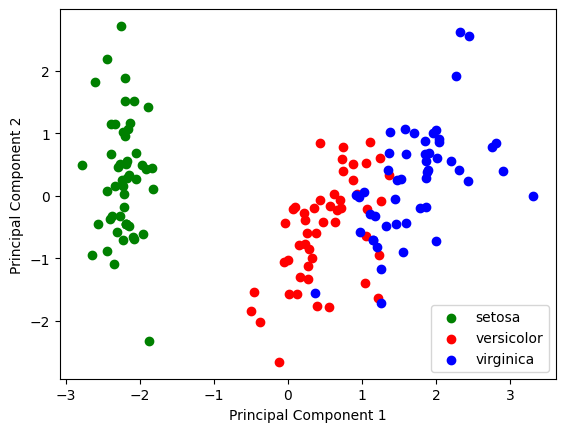

In [10]:
dfsetosa=final_dataframe[df.target=='Iris-setosa']
dfversicolor=final_dataframe[df.target=='Iris-versicolor']
dfvirginica=final_dataframe[df.target=='Iris-virginica']
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.scatter(dfsetosa['principal component 1'],dfsetosa['principal component 2'],color='green',label='setosa')
plt.scatter(dfversicolor['principal component 1'],dfversicolor['principal component 2'],color='red',label='versicolor')
plt.scatter(dfvirginica['principal component 1'],dfvirginica['principal component 2'],color='blue',label='virginica')
plt.legend()

Daha profesyonel bir plotting yapalım:

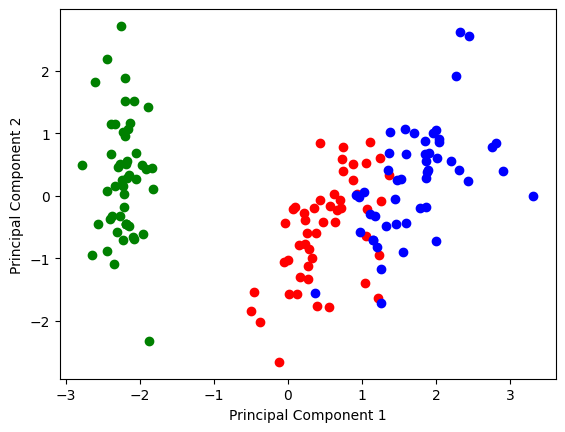

In [12]:
targets=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['g','r','b']

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for target, color in zip(targets, colors):
    dftemp=final_dataframe[final_dataframe.target==target]
    plt.scatter(dftemp['principal component 1'],dftemp['principal component 2'],color=color)

In [13]:
pca.explained_variance_ratio_ #bize her bir bileşenin ne kadar varyans yakaladığını gösterir.

array([0.72770452, 0.23030523])

In [ ]:
pca.explained_variance_ratio_.sum() 

0.9580097536148197

In [ ]:
#sonuç olarak %96 kurmuşumuz. Yani 4 boyuttan 2 boyuta indirgerken verinin %96'sını korumuş olduk.
#güzel oran